In [1]:
import pandas as pd
import sqlite3
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn=sqlite3.connect('inventory.db')

In [3]:
df=pd.read_sql_query('select * from Vendor_Sales_Summary',conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,Total_PurchaseQuantity,Total_PurchaseDollar,TotalSalesQuantity,TotalSalesDollar,TotalExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalePurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Total_PurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
Total_PurchaseDollar,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollar,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05


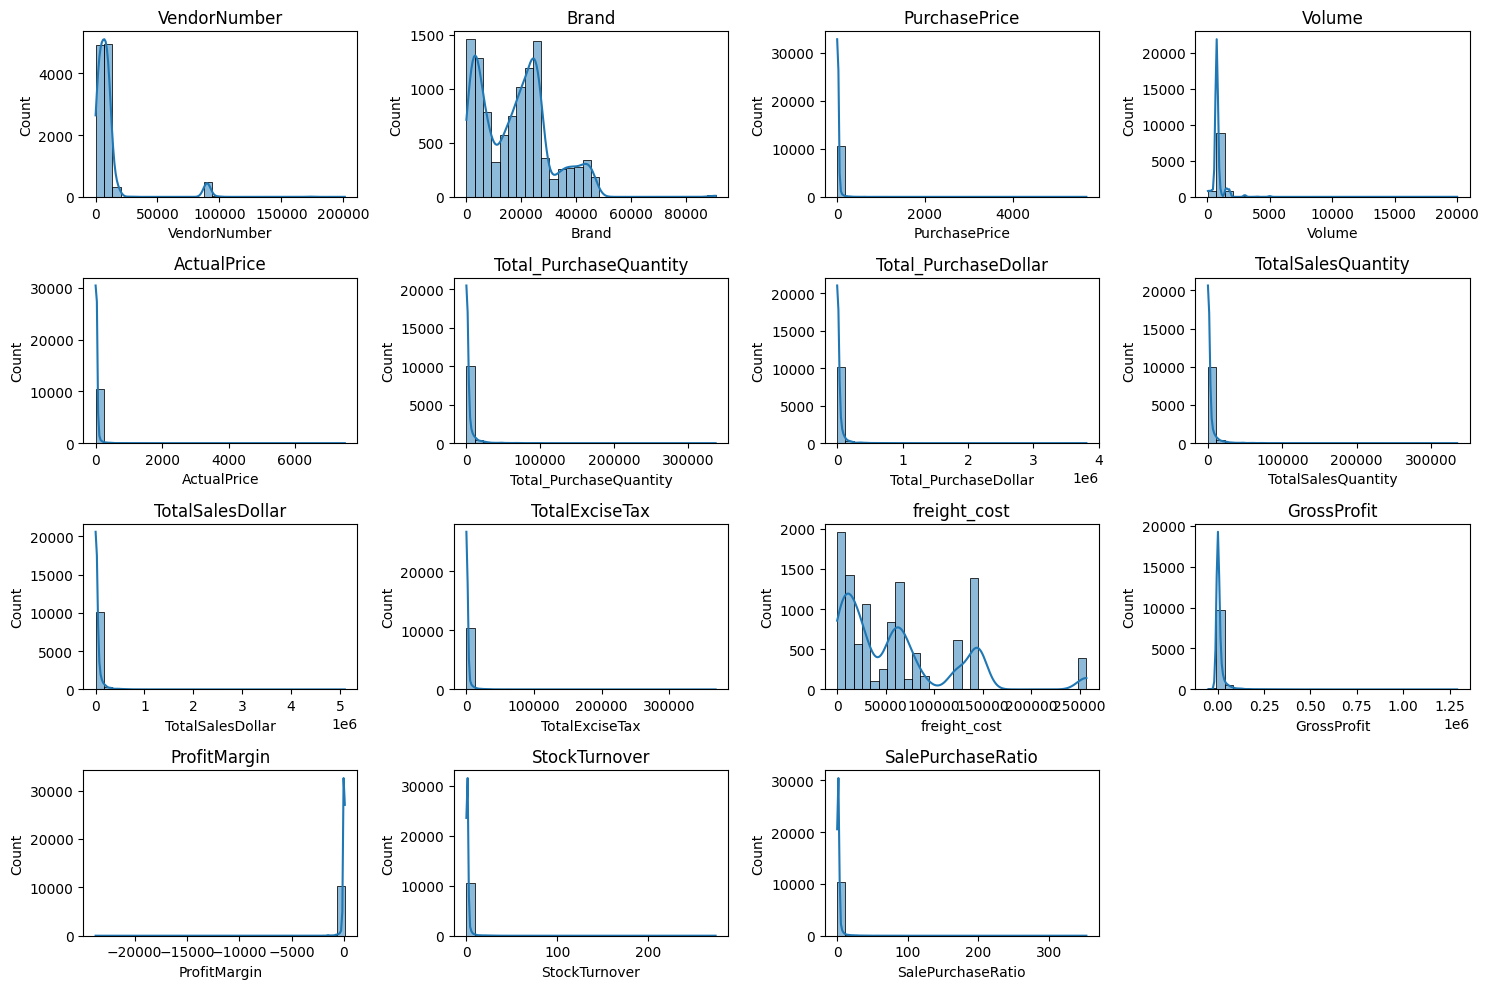

In [69]:


# Numerical columns select
numerical_cols = df.select_dtypes(include=np.number).columns

# Figure create
plt.figure(figsize=(15, 10))

# Loop through numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # 4x4 grid
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


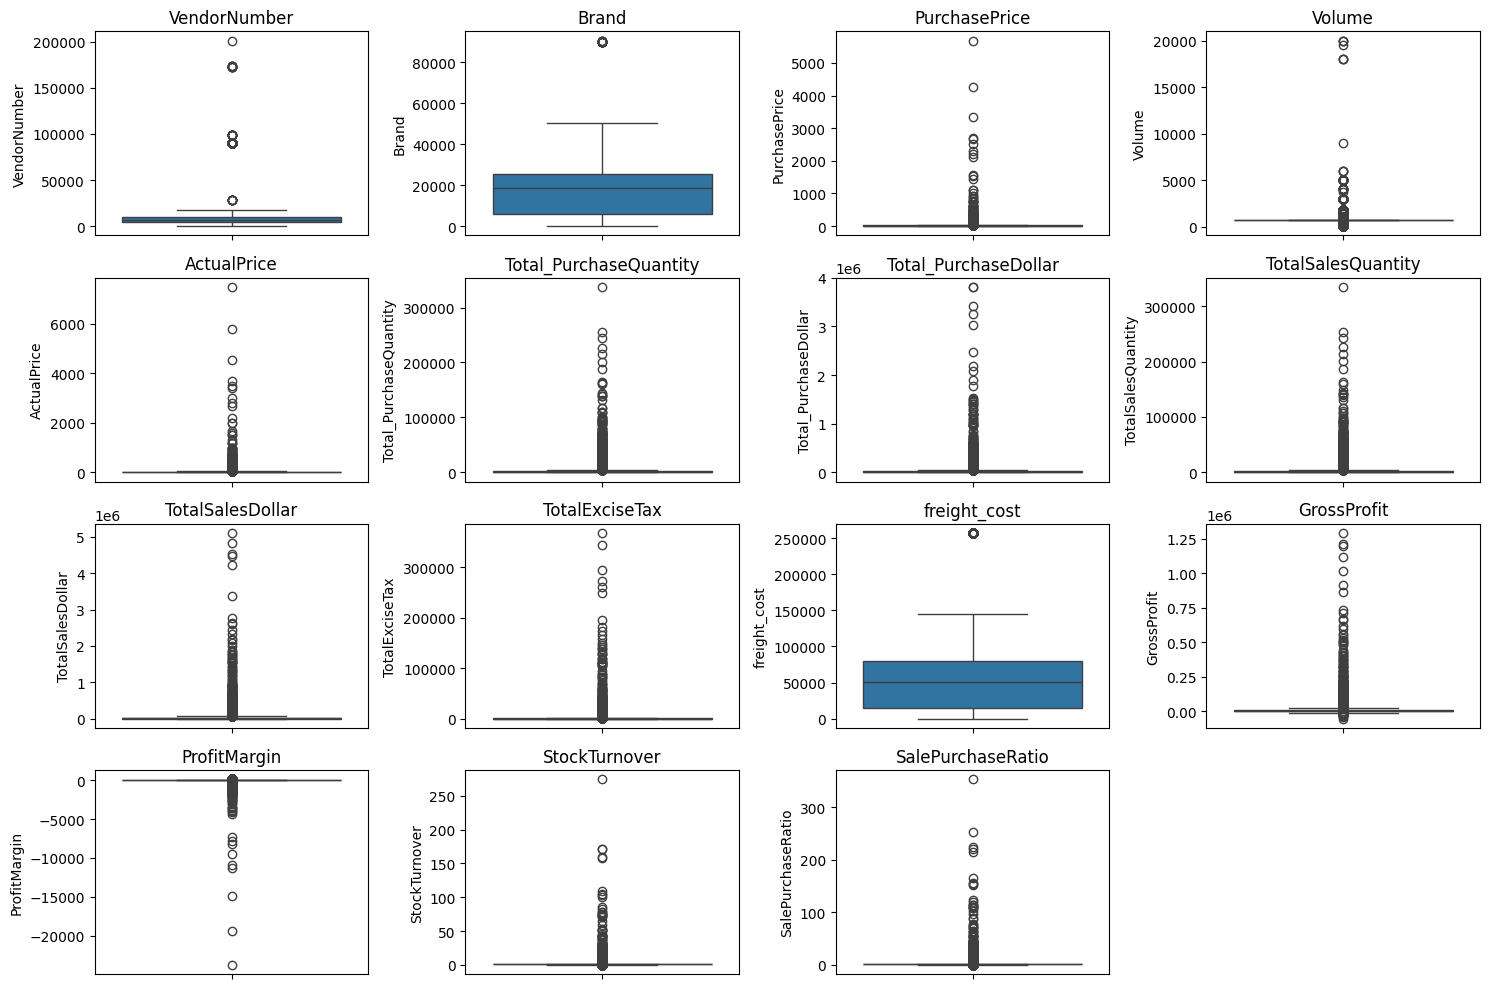

In [55]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Figure create
plt.figure(figsize=(15, 10))

# Loop through numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # 4x4 grid
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [6]:
df=pd.read_sql_query("""select * from Vendor_Sales_Summary where GrossProfit>0 and ProfitMargin>0 and TotalSalesQuantity>0""",conn)
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,Total_PurchaseQuantity,Total_PurchaseDollar,TotalSalesQuantity,TotalSalesDollar,TotalExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalePurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.0,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,134.0,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,2.0,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,72.0,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388


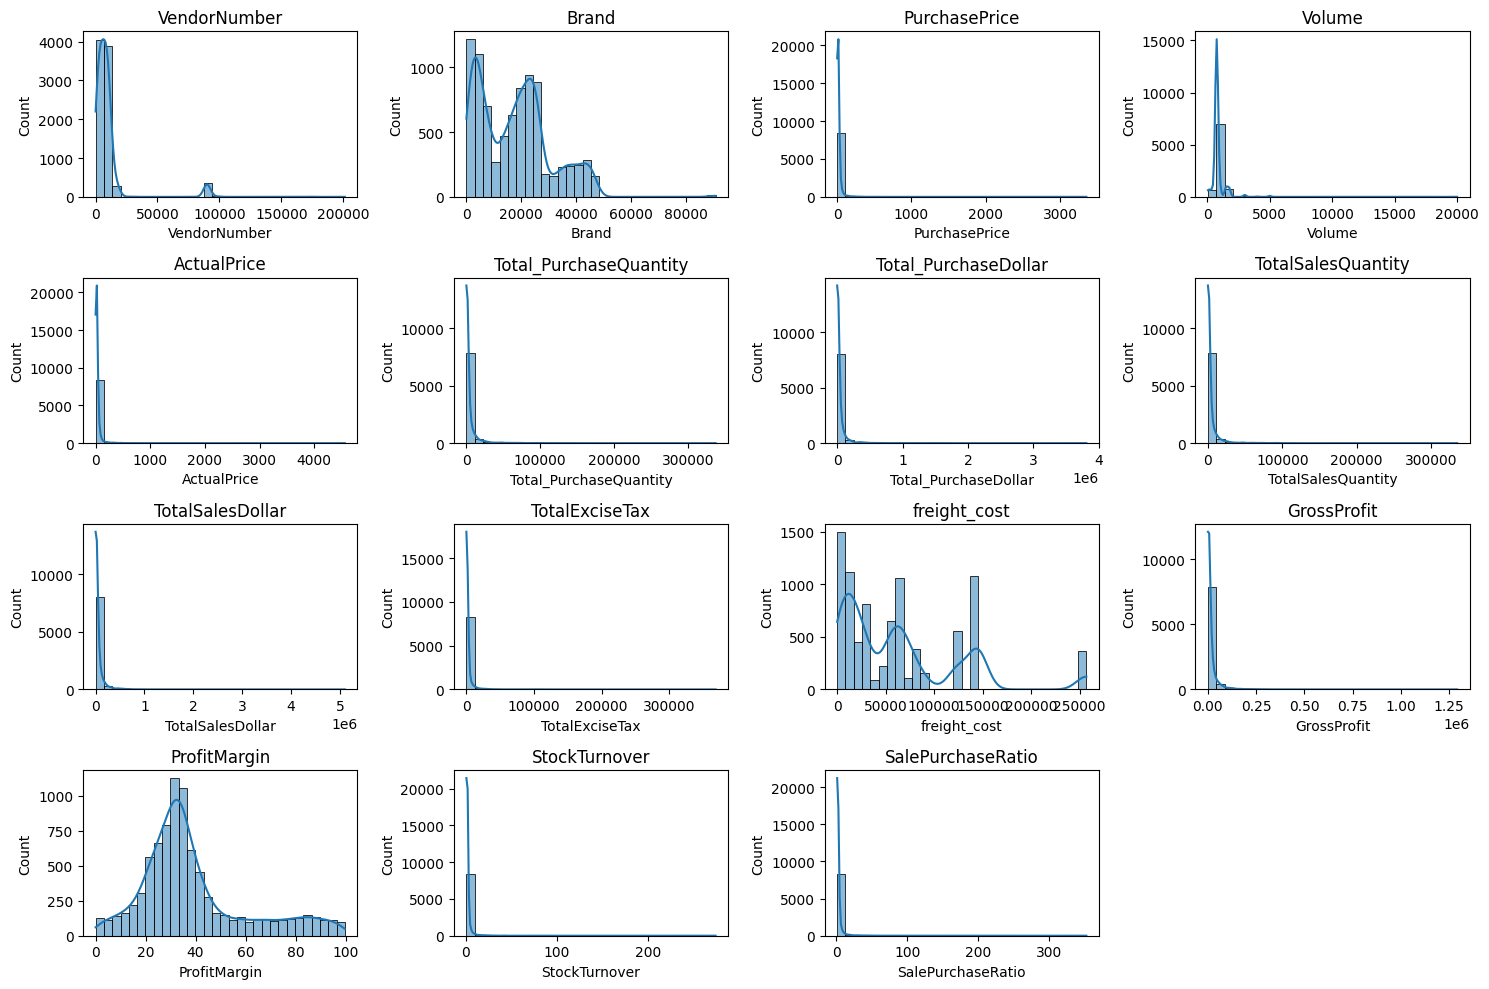

In [68]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Figure create
plt.figure(figsize=(15, 10))

# Loop through numerical columns
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # 4x4 grid
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

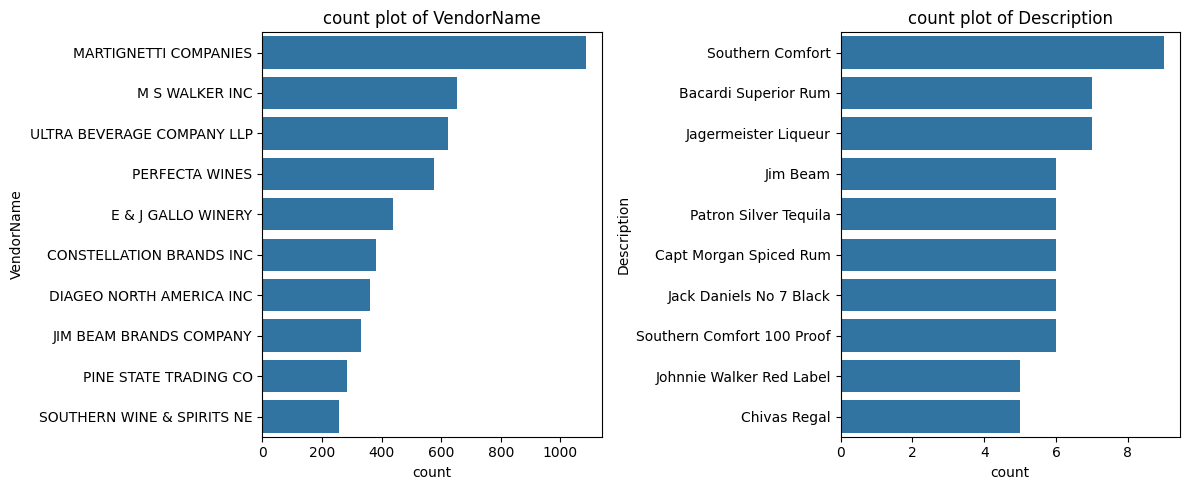

In [7]:
#count plots for categorical col
categorical=['VendorName','Description']

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

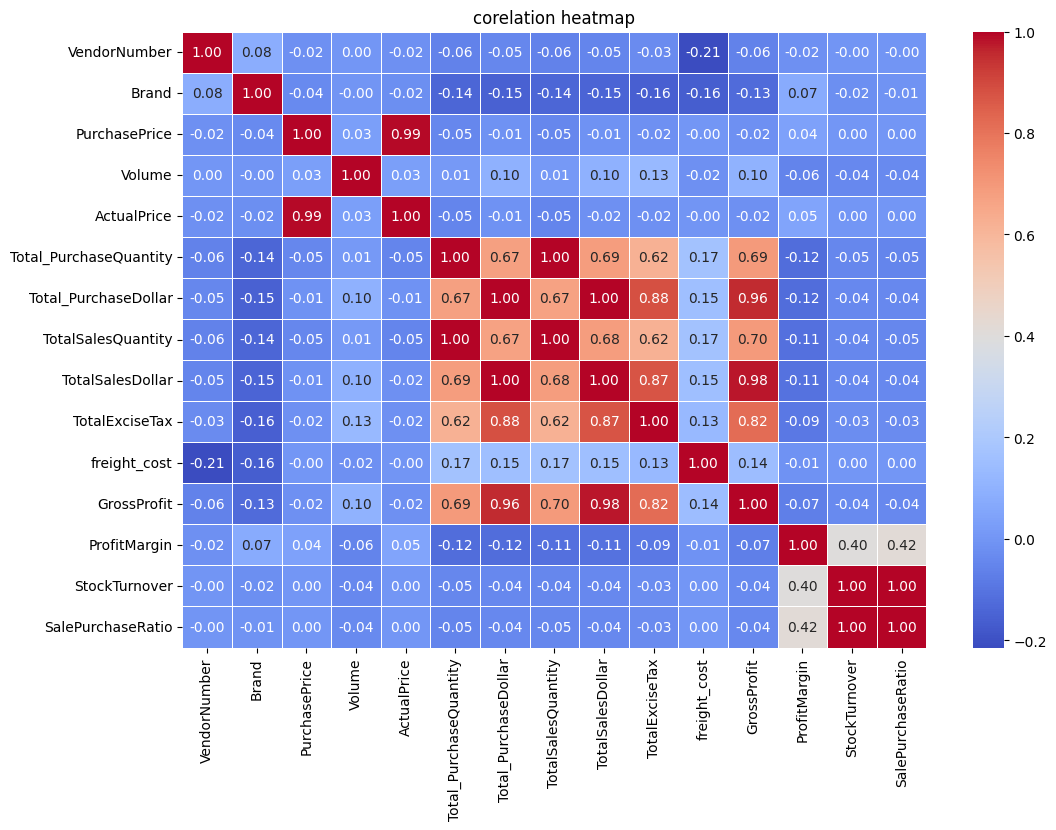

In [72]:
# corelation heatmap 
plt.figure(figsize=(12,8))
corelation_matrix=df[numerical_cols].corr()
sns.heatmap(corelation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("corelation heatmap")
plt.show()

#Analysis

Identify Brands that neeeds Promotional or Pricing  adjustment Which exhibit lower sales performance profit margins.

In [8]:
brand_performance=df.groupby('Description').agg({'TotalSalesDollar':'sum',
                             'ProfitMargin':'mean'}).reset_index()
brand_performance                             

,Description,TotalSalesDollar,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [9]:
low_sales_threshold=brand_performance['TotalSalesDollar'].quantile(0.15)
high_sales_threshold=brand_performance['ProfitMargin'].quantile(0.85)


In [10]:
low_sales_threshold


np.float64(560.299)

In [11]:
high_sales_threshold

np.float64(64.97017552750113)

In [21]:
#filter brands with low sale but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollar'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_sales_threshold)
]


print('Brands with low sales but High profit margin')
display(target_brands.sort_values('TotalSalesDollar'))

Brands with low sales but High profit margin


,Description,TotalSalesDollar,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
1649,Ch Lynch Bages Paulliac 11,9799.30,94.323472
7297,Uncle Val's Peppered Gin,9812.45,70.489531
3258,Glendalough 13 Yr Sngle Malt,9838.85,73.679851
995,Brugal XV Rum,9971.01,84.653210


In [25]:
brand_performance = brand_performance[brand_performance['TotalSalesDollar'] < 10000]

In [26]:
high_margin_threshold = 0.2  # 20% margin
low_sales_threshold = 10000 


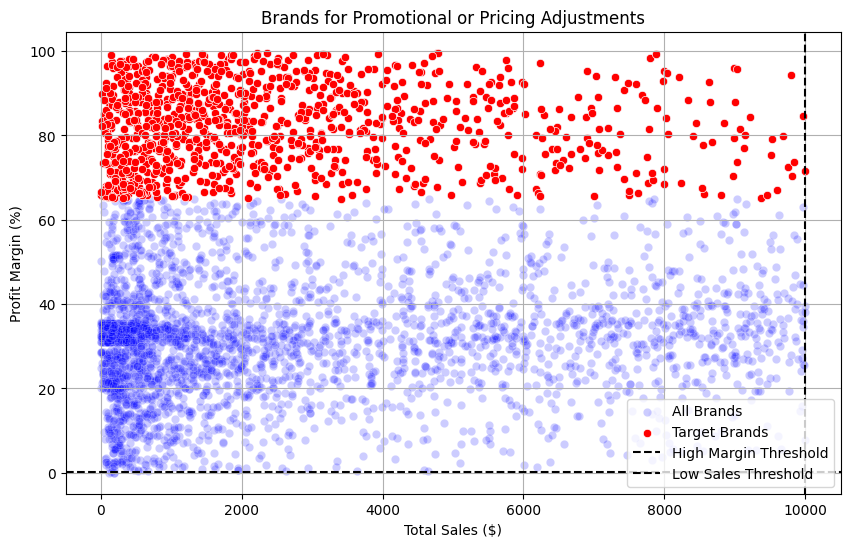

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollar', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollar', y='ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt. legend()
plt.grid(True)
plt.show()

Which vendors and brands performance the highest sales performance.

In [33]:

        
   def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

    
    

In [29]:
top_vendors=df.groupby("VendorName")["TotalSalesDollar"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollar"].sum().nlargest(10)

In [30]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollar, dtype: float64

In [31]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollar, dtype: float64

In [34]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollar, dtype: object

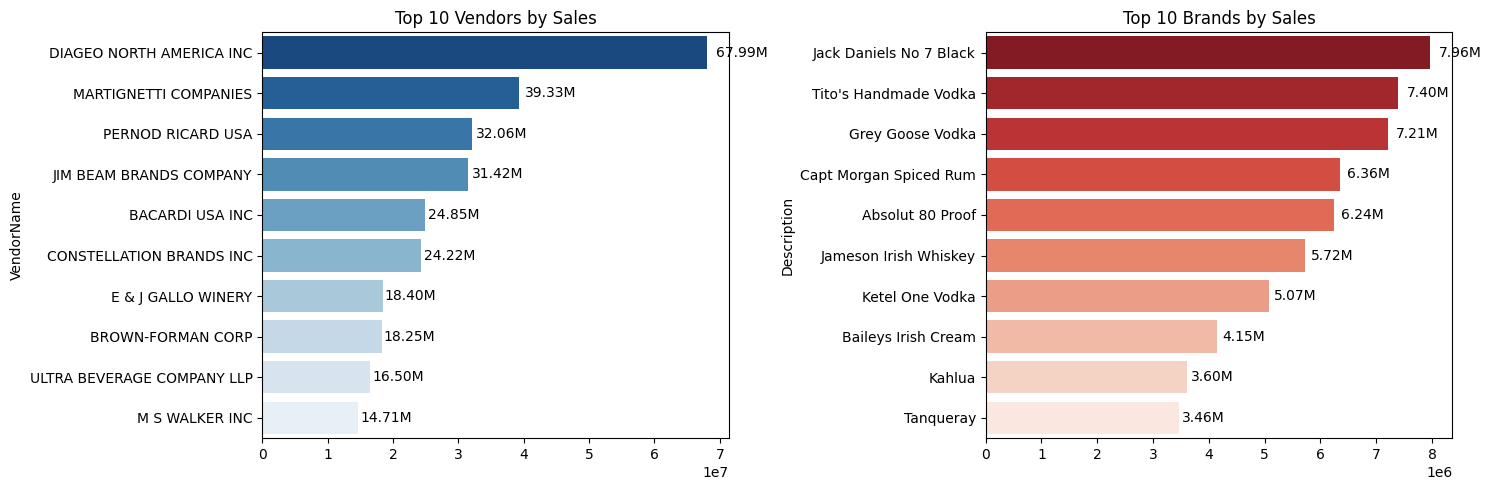

In [35]:


plt.figure(figsize=(15, 5))

# ----------------- Top Vendors -----------------
plt.subplot(1, 2, 1)

# Assign hue to avoid FutureWarning
ax1 = sns.barplot(
    y=top_vendors.index,
    x=top_vendors.values,
    hue=top_vendors.index,
    dodge=False,
    palette="Blues_r",
    legend=False
)

plt.title("Top 10 Vendors by Sales")

# Add value labels outside the bars
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# ----------------- Top Brands -----------------
plt.subplot(1, 2, 2)

ax2 = sns.barplot(
    y=top_brands.index.astype(str),
    x=top_brands.values,
    hue=top_brands.index.astype(str),
    dodge=False,
    palette="Reds_r",
    legend=False
)

plt.title("Top 10 Brands by Sales")

# Add value labels
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

In [87]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,Total_PurchaseQuantity,Total_PurchaseDollar,TotalSalesQuantity,TotalSalesDollar,TotalExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalePurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


Which Vendors contribute most to total purchase dollars?

In [36]:
vendor_performance=df.groupby('VendorName').agg({
    'Total_PurchaseDollar':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollar':'sum'}).reset_index()

    

In [37]:
vendor_performance

,VendorName,Total_PurchaseDollar,GrossProfit,TotalSalesDollar
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [38]:
vendor_performance['PurchaseContribution'] = (vendor_performance['Total_PurchaseDollar'] / vendor_performance['Total_PurchaseDollar'].sum()*100)


In [39]:
vendor_performance

,VendorName,Total_PurchaseDollar,GrossProfit,TotalSalesDollar,PurchaseContribution
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [40]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution',ascending=False),2)
vendor_performance

,VendorName,Total_PurchaseDollar,GrossProfit,TotalSalesDollar,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [41]:
top_vendors = vendor_performance.head(10).copy()

top_vendors['TotalSalesDollar'] = top_vendors['TotalSalesDollar'].apply(format_dollars)
top_vendors['Total_PurchaseDollar'] = top_vendors['Total_PurchaseDollar'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors[['VendorName', 'Total_PurchaseDollar', 'GrossProfit', 'TotalSalesDollar', 'PurchaseContribution']]


,VendorName,Total_PurchaseDollar,GrossProfit,TotalSalesDollar,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [42]:
top_vendors['PurchaseContribution'].sum()

np.float64(65.69000000000001)

In [43]:
top_vendors['Cumulative_value']=top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,Total_PurchaseDollar,GrossProfit,TotalSalesDollar,PurchaseContribution,Cumulative_value
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


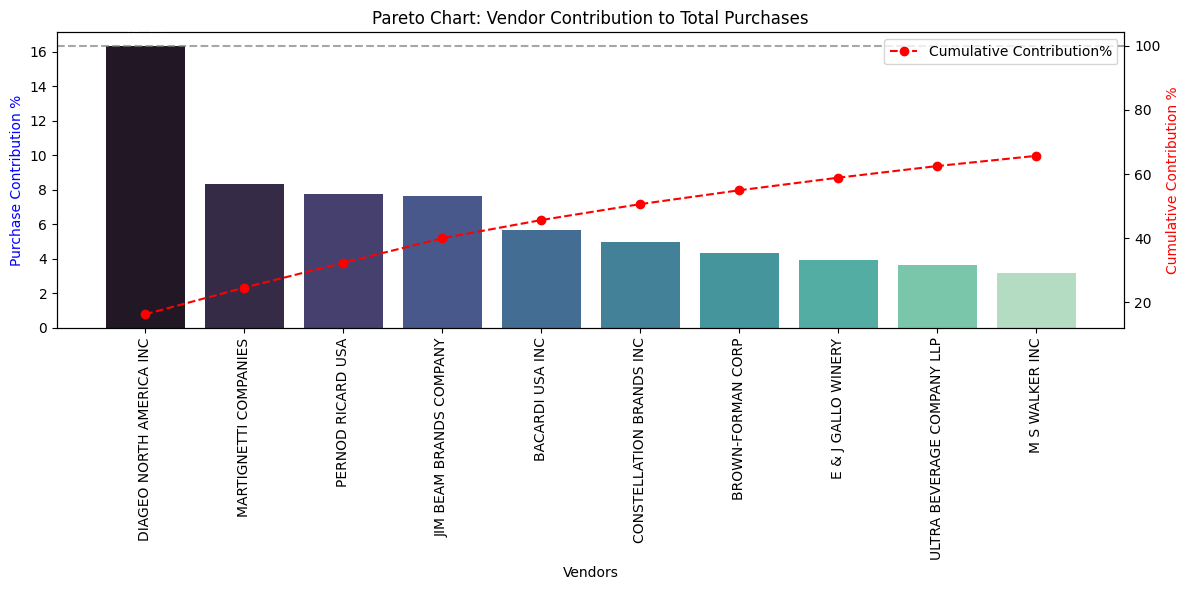

In [44]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot
sns.barplot(
    x='VendorName', 
    y='PurchaseContribution', 
    data=top_vendors,
    palette="mako", 
    ax=ax1,
    hue='VendorName', 
    dodge=False
)

# Remove legend only if exists
if ax1.get_legend() is not None:
    ax1.get_legend().remove()

# Add value labels
for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10, color='white')

# Line Plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_value'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution%'
)

# Fix xticks
ax1.set_xticks(range(len(top_vendors)))
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

# Labels & Title
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?

In [45]:
vendor=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

In [49]:
remaining_contribution

np.float64(34.30999999999999)

In [50]:
vendor.append("Other Vendor")
purchase_contribution.append(remaining_contribution)

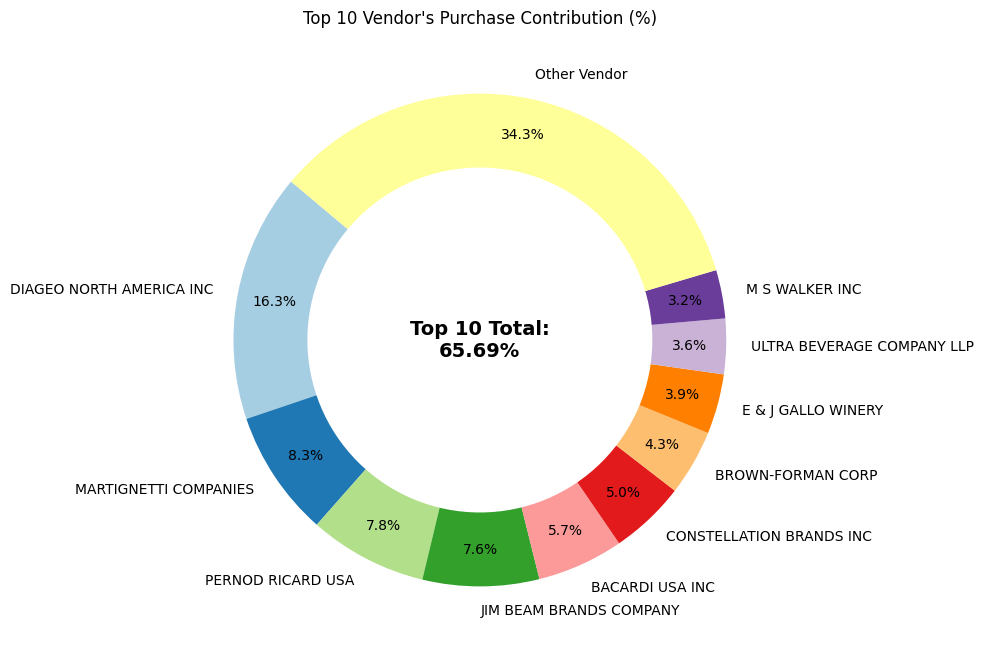

In [51]:
# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendor, autopct='%1.1f%%',
startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution :.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price,and what is optimal purchase volume for cost savings?

In [53]:
df['UnitPurchasePrice']=df['Total_PurchaseDollar'] / df['Total_PurchaseQuantity']

In [56]:
df['OrderSize']=pd.qcut(df['Total_PurchaseQuantity'],q=3,labels=['small','medium','large'])

In [57]:
df.groupby('OrderSize', observed=False)[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
small,39.068186
medium,15.486414
large,10.777625


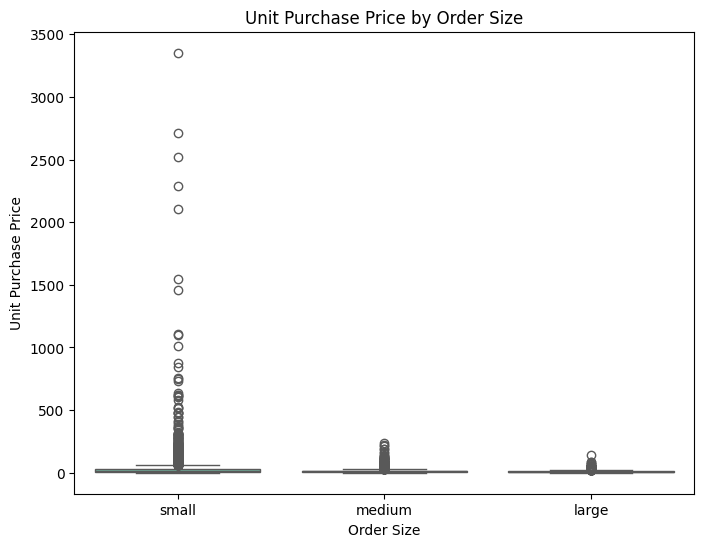

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OrderSize', y='UnitPurchasePrice', data=df,   hue='OrderSize',    
    dodge=False,palette="Set2")

plt.title("Unit Purchase Price by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.show()

Which vendors have low inventory,turnover,indicating excess stock slow-moving products?

In [132]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold invetory per vendor,and which vendors cpnribute the most to it.

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,Total_PurchaseQuantity,Total_PurchaseDollar,TotalSalesQuantity,TotalSalesDollar,TotalExciseTax,freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalePurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,142049.0,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,160247.0,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,187140.0,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,200412.0,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,135838.0,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large


In [65]:
df['UnsoldInventoryValue'] = (df['Total_PurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:',format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [66]:
inventory_value_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_value_vendor=inventory_value_vendor.sort_values('UnsoldInventoryValue',ascending=False)
inventory_value_vendor['UnsoldInventoryValue']=inventory_value_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


what is the 95% confidence intervals for profit of top-performing and low-performing vendor?

In [68]:
top_thresold=df['TotalSalesDollar'].quantile(0.75)
low_thresold=df['TotalSalesDollar'].quantile(0.25)

In [70]:
top_thresold

np.float64(40622.1125)

In [72]:
low_thresold

np.float64(1355.58)

In [80]:
top_vendor=df[df['TotalSalesDollar']>=top_thresold]['ProfitMargin'].dropna()
low_vendor=df[df['TotalSalesDollar']<=top_thresold]['ProfitMargin'].dropna()

In [92]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1)/np.sqrt(len(data))  # standard error of mean
    t_critical =  stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error=t_critical * std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error


In [95]:
top_mean,top_lower,top_upper=confidence_interval(top_vendor)
low_mean,low_lower,low_upper=confidence_interval(low_vendor)

In [100]:
print(f"Top Vendors 95% CI: ({top_lower :.2f},{top_upper :.2f}), Mean: {top_mean: .2f}")
print(f"Low Vendors 95% CI: ({low_lower :.2f},{low_upper :.2f}), Mean: {low_mean: .2f}")

Top Vendors 95% CI: (30.74,31.61), Mean:  31.18
Low Vendors 95% CI: (40.67,41.81), Mean:  41.24


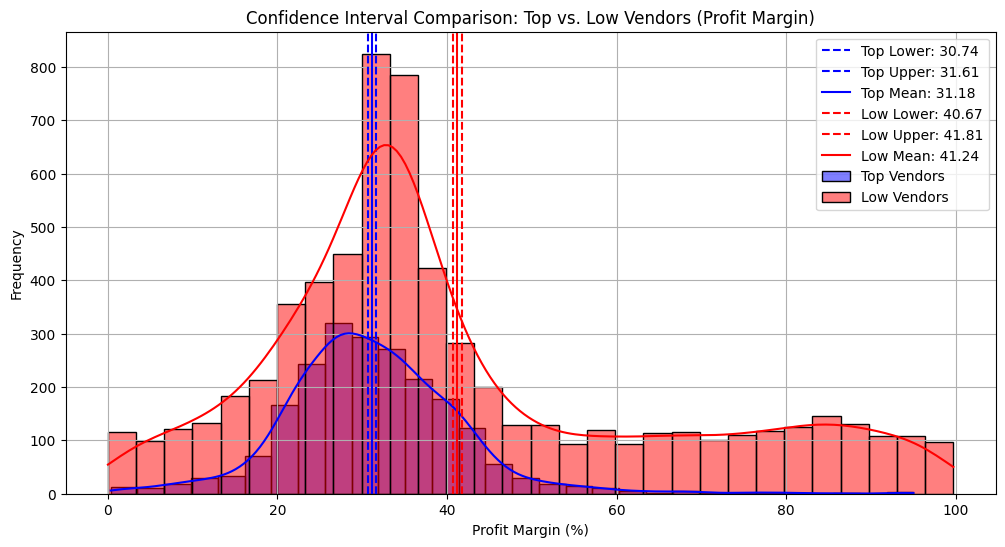

In [108]:



plt.figure(figsize=(12,6))

# Top Vendors
sns.histplot(top_vendor, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors
sns.histplot(low_vendor, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.show()


Is there a significant diffrence in profit margins between top_performing and low performing vendors?

In [115]:

from scipy.stats import ttest_ind

# Thresholds
top_threshold = df["TotalSalesDollar"].quantile(0.75)
low_threshold = df["TotalSalesDollar"].quantile(0.25)

# ProfitMargin for Top and Low Vendors
top_vendors = df[df["TotalSalesDollar"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollar"] <= low_threshold]["ProfitMargin"].dropna()

# Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Ho: Significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: Significant difference in profit margins between top and low-performing vendors.
